# NLP-Digit

kaggle上的數字辨識

https://www.kaggle.com/competitions/digit-recognizer/overview




# 導入需要的函式庫

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 訓練資料下載


In [2]:
!git clone https://github.com/wehrley/Kaggle-Digit-Recognizer.git
!cp Kaggle-Digit-Recognizer/train.csv train.csv
!cp Kaggle-Digit-Recognizer/test.csv test.csv

Cloning into 'Kaggle-Digit-Recognizer'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5 (delta 1), reused 5 (delta 1), pack-reused 0
Unpacking objects: 100% (5/5), 19.33 MiB | 3.73 MiB/s, done.


# 設定 train_data 和 test_data

In [3]:
#將csv檔讀進來
with open('train.csv', 'r') as file:
    csv_lines=file.readlines()
x=[]
y=[]
for i in range(1, len(csv_lines)):    
    #去掉換行符號並以逗號分割
    row=csv_lines[i].replace('\n', '').split(',')
    #去掉label欄位，並將字串轉為整數
    x.append(list(map(int, row[1:])))
    #抓出label欄位，並將字串轉為整數
    y.append(list(map(int, row[0])))

#one-hot encoding
y = to_categorical(y, num_classes=10)

#轉成np.array，正規化
x=np.array(x)/255.0
y=np.array(y)
print(x.shape)
print(y.shape)


(42000, 784)
(42000, 10)


# 設定model

In [4]:
# 宣告這是一個 Sequential 循序性的深度學習模型
model = Sequential()
# 加入第一層hidden layer(512 neurons)
# 因為第一層hidden layer需連接input vector故需要在此指定 input_shape、activation function、dropout比例
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))


# 指定 輸出層模型
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
# 指定 loss function, optimizier, metrics
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics=['accuracy'])

# 指定 batch_size, epochs, validation 後，開始訓練模型
history = model.fit(x, y,
          batch_size = 256,
          epochs = 20,
          validation_split = 0.3,
          verbose = 1)

Epoch 1/20
115/115 [==============================] - 6s 7ms/step - loss: 0.4607 - accuracy: 0.8615 - val_loss: 0.1938 - val_accuracy: 0.9434
Epoch 2/20
115/115 [==============================] - 1s 5ms/step - loss: 0.1877 - accuracy: 0.9432 - val_loss: 0.1344 - val_accuracy: 0.9592
Epoch 3/20
115/115 [==============================] - 1s 5ms/step - loss: 0.1341 - accuracy: 0.9601 - val_loss: 0.1107 - val_accuracy: 0.9664
Epoch 4/20
115/115 [==============================] - 1s 5ms/step - loss: 0.1065 - accuracy: 0.9670 - val_loss: 0.0912 - val_accuracy: 0.9725
Epoch 5/20
115/115 [==============================] - 1s 5ms/step - loss: 0.0840 - accuracy: 0.9744 - val_loss: 0.0931 - val_accuracy: 0.9723
Epoch 6/20
115/115 [==============================] - 1s 5ms/step - loss: 0.0700 - accuracy: 0.9776 - val_loss: 0.0948 - val_accuracy: 0.9713
Epoch 7/20
115/115 [==============================] - 1s 5ms/step - loss: 0.0592 - accuracy: 0.9815 - val_loss: 0.0825 - val_accuracy: 0.9767
Epoch 

# 預測

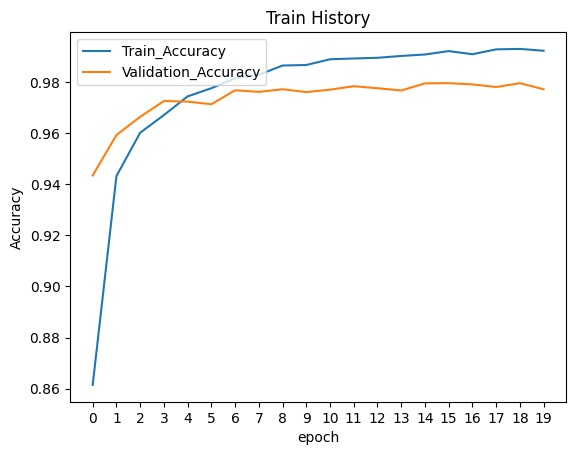

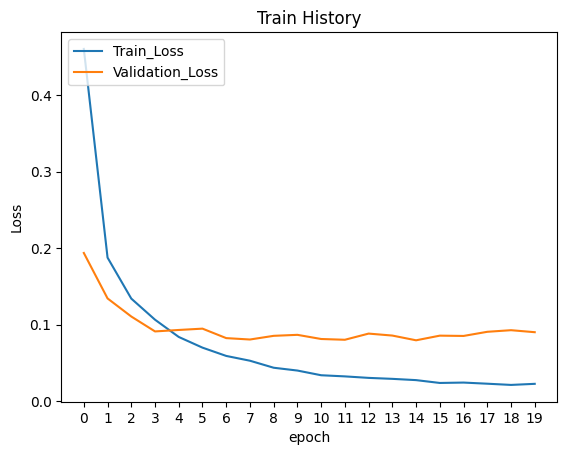

In [6]:
def show_train_history(train_history):
    plt.plot(train_history.history['accuracy'])
    plt.plot(train_history.history['val_accuracy'])
    plt.xticks([i for i in range(0, len(train_history.history['accuracy']))])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train_Accuracy', 'Validation_Accuracy'], loc='upper left')
    plt.show()

    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.xticks([i for i in range(0, len(train_history.history['loss']))])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train_Loss', 'Validation_Loss'], loc='upper left')
    plt.show()
show_train_history(history)


# 提交

In [ ]:
submit = 'ImageId,Label\n'
with open('test.csv', 'r') as file:
    csv_lines = file.readlines()
image_id = 1
for i in range(1, len(csv_lines)):
    # 去掉換行符號並以逗號分割
    row = csv_lines[i].replace('\n', '').split(',')
    # 並將字串轉為整數，正規化並預測
    predict_x = model.predict(np.array([list(map(int, row))])/255.0, verbose=0)
    result = np.argmax(predict_x, axis=1)
    submit += str(image_id) + ',' + str(result.tolist()[0])+'\n'
    image_id += 1
# 存成CSV檔
open('submit.csv', 'w').write(submit)
